In [41]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("C:/Users/yasir/Downloads/Employee.csv")
df.head()


,Company,Age,Salary,Place,Country,Gender
0,TCS,20.0,NaN,Chennai,India,0
1,Infosys,30.0,NaN,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Company  140 non-null    object 
 1   Age      130 non-null    float64
 2   Salary   124 non-null    float64
 3   Place    134 non-null    object 
 4   Country  148 non-null    object 
 5   Gender   148 non-null    int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 7.1+ KB


In [8]:
df.isnull().sum()

Company     8
Age        18
Salary     24
Place      14
Country     0
Gender      0
dtype: int64

## Data Exploration

In [11]:
# Get unique values and their count for each column
unique_values = {col: (df[col].unique(), df[col].nunique()) for col in df.columns}
unique_values

{'Company': (array(['TCS', 'Infosys', 'CTS', nan, 'Tata Consultancy Services',
         'Congnizant', 'Infosys Pvt Lmt'], dtype=object),
  6),
 'Age': (array([20., 30., 35., 40., 23., nan, 34., 45., 18., 22., 32., 37., 50.,
         21., 46., 36., 26., 41., 24., 25., 43., 19., 38., 51., 31., 44.,
         33., 17.,  0., 54.]),
  29),
 'Salary': (array([  nan, 2300., 3000., 4000., 5000., 6000., 7000., 8000., 9000.,
         1089., 1234., 3030., 3045., 3184., 4824., 5835., 7084., 8943.,
         8345., 9284., 9876., 2034., 7654., 2934., 4034., 5034., 8202.,
         9024., 4345., 6544., 6543., 3234., 4324., 5435., 5555., 8787.,
         3454., 5654., 5009., 5098., 3033.]),
  40),
 'Place': (array(['Chennai', 'Mumbai', 'Calcutta', 'Delhi', 'Podicherry', 'Cochin',
         nan, 'Noida', 'Hyderabad', 'Bhopal', 'Nagpur', 'Pune'],
        dtype=object),
  11),
 'Country': (array(['India'], dtype=object), 1),
 'Gender': (array([0, 1], dtype=int64), 2)}

In [15]:
# Statistical analysis of numerical columns
stats = df.describe()

# Renaming columns for better readability
df.rename(columns={
    "Company": "Company_ID",
    "Age": "Employee_Age",
    "Salary": "Employee_Salary",
    "Place": "Employee_Location",
    "Country": "Employee_Country",
    "Gender": "Employee_Gender"
}, inplace=True)

# Display updated column names and statistical summary
df.head()


,Company_ID,Employee_Age,Employee_Salary,Employee_Location,Employee_Country,Employee_Gender
0,TCS,20.0,NaN,Chennai,India,0
1,Infosys,30.0,NaN,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0


In [17]:
df.describe()


,Employee_Age,Employee_Salary,Employee_Gender
count,130.000000,124.000000,148.000000
mean,30.484615,5312.467742,0.222973
std,11.096640,2573.764683,0.417654
min,0.000000,1089.000000,0.000000
25%,22.000000,3030.000000,0.000000
50%,32.500000,5000.000000,0.000000
75%,37.750000,8000.000000,0.000000
max,54.000000,9876.000000,1.000000


In [22]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Company_ID         140 non-null    object 
 1   Employee_Age       130 non-null    float64
 2   Employee_Salary    124 non-null    float64
 3   Employee_Location  134 non-null    object 
 4   Employee_Country   148 non-null    object 
 5   Employee_Gender    148 non-null    int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 7.1+ KB


## Data Cleaning

In [26]:
# Step 1: Standardizing Company Names
df["Company_ID"] = df["Company_ID"].replace({
    "Tata Consultancy Services": "TCS",
    "Congnizant": "CTS",
    "Infosys Pvt Lmt": "Infosys"
})

# Step 2: Replacing 0 in Age with NaN
df["Employee_Age"] = df["Employee_Age"].replace(0, pd.NA)

# Step 3: Fixing Place Name Issues
df["Employee_Location"] = df["Employee_Location"].replace({"Podicherry": "Puducherry"})

# Step 4: Removing Duplicate Rows
df = df.drop_duplicates()

# Step 5: Handling Missing Values
df["Employee_Age"].fillna(df["Employee_Age"].median(), inplace=True)
df["Employee_Salary"].fillna(df["Employee_Salary"].median(), inplace=True)
df["Company_ID"].fillna(df["Company_ID"].mode()[0], inplace=True)
df["Employee_Location"].fillna(df["Employee_Location"].mode()[0], inplace=True)

# Check updated dataset info
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 144 entries, 0 to 147
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Company_ID         144 non-null    object 
 1   Employee_Age       144 non-null    float64
 2   Employee_Salary    144 non-null    float64
 3   Employee_Location  144 non-null    object 
 4   Employee_Country   144 non-null    object 
 5   Employee_Gender    144 non-null    int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 7.9+ KB


C:\Users\yasir\AppData\Local\Temp\ipykernel_21976\4268799825.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Company_ID"] = df["Company_ID"].replace({
C:\Users\yasir\AppData\Local\Temp\ipykernel_21976\4268799825.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Employee_Age"] = df["Employee_Age"].replace(0, pd.NA)
C:\Users\yasir\AppData\Local\Temp\ipykernel_21976\4268799825.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_ind

In [28]:
df.isnull().sum()

Company_ID           0
Employee_Age         0
Employee_Salary      0
Employee_Location    0
Employee_Country     0
Employee_Gender      0
dtype: int64

In [30]:
df.head()

,Company_ID,Employee_Age,Employee_Salary,Employee_Location,Employee_Country,Employee_Gender
0,TCS,20.0,5000.0,Chennai,India,0
1,Infosys,30.0,5000.0,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0


In [36]:
df.Employee_Age


0      20.0
1      30.0
2      35.0
3      40.0
4      23.0
       ... 
142    22.0
143    33.0
145    44.0
146    33.0
147    22.0
Name: Employee_Age, Length: 144, dtype: float64

In [38]:
df["Employee_Age"].unique()

array([20., 30., 35., 40., 23., 33., 34., 45., 18., 22., 32., 37., 50.,
       21., 46., 36., 26., 41., 24., 25., 43., 19., 38., 51., 31., 44.,
       17., 54.])

## Data Analysis

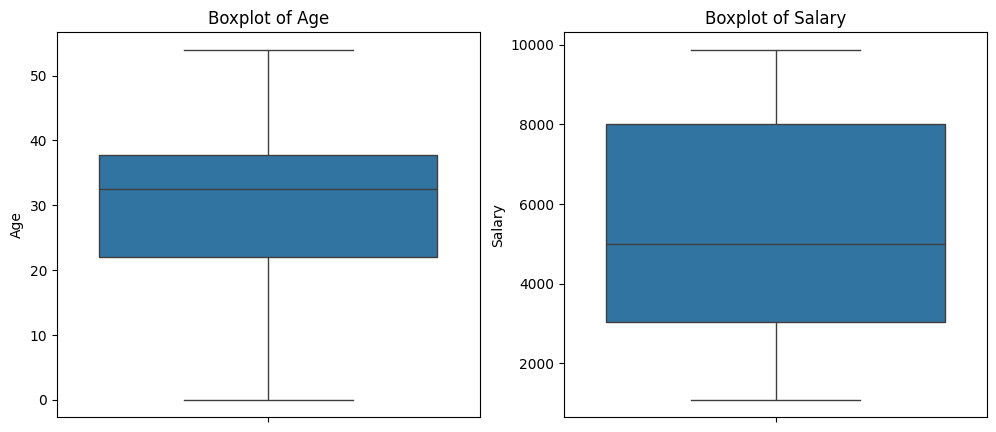

In [48]:
# Boxplots to visualize outliers in Age and Salary
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.boxplot(y=df["Age"])
plt.title("Boxplot of Age")

plt.subplot(1, 2, 2)
sns.boxplot(y=df["Salary"])
plt.title("Boxplot of Salary")

plt.show()


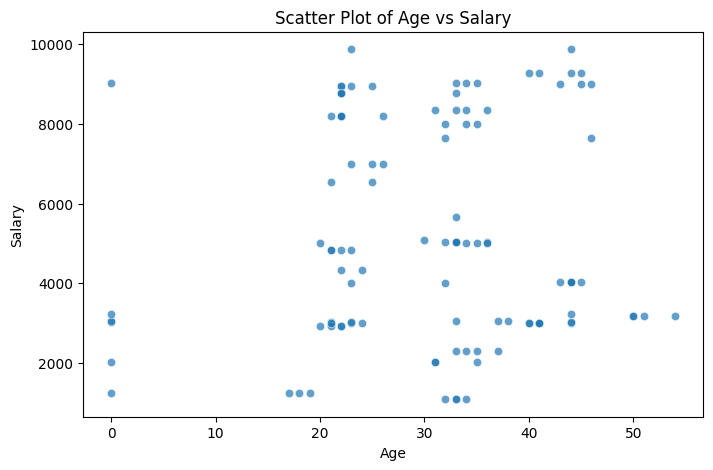

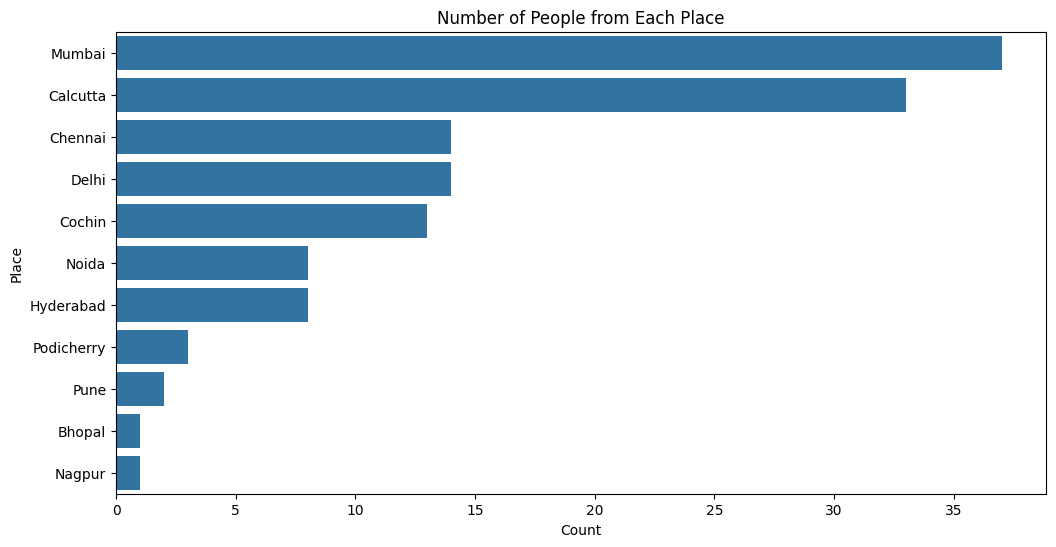

,Company,Age,Salary,Place,Country,Gender
21,Infosys,50.0,3184.0,Delhi,India,0
32,Infosys,45.0,4034.0,Calcutta,India,0
39,Infosys,41.0,3000.0,Mumbai,India,0
50,Infosys,41.0,3000.0,Chennai,India,0
57,Infosys,51.0,3184.0,Hyderabad,India,0


In [50]:
# Filtering data: Age > 40 and Salary < 5000
filtered_df = df[(df["Age"] > 40) & (df["Salary"] < 5000)]

# Scatter plot of Age vs Salary
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df["Age"], y=df["Salary"], alpha=0.7)
plt.xlabel("Age")
plt.ylabel("Salary")
plt.title("Scatter Plot of Age vs Salary")
plt.show()

# Count plot of people from each place
plt.figure(figsize=(12, 6))
sns.countplot(y=df["Place"], order=df["Place"].value_counts().index)
plt.xlabel("Count")
plt.ylabel("Place")
plt.title("Number of People from Each Place")
plt.show()

# Display the filtered data
filtered_df.head()


## Data Encoding

In [53]:
from sklearn.preprocessing import LabelEncoder

# Label Encoding for 'Company' and 'Place'
label_enc = LabelEncoder()
df["Company"] = label_enc.fit_transform(df["Company"])
df["Place"] = label_enc.fit_transform(df["Place"])

# Display encoded dataset sample
df.head()


,Company,Age,Salary,Place,Country,Gender
0,4,20.0,NaN,2,India,0
1,2,30.0,NaN,6,India,0
2,4,35.0,2300.0,1,India,0
3,2,40.0,3000.0,4,India,0
4,4,23.0,4000.0,6,India,0


## Feature Scaling

In [70]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Selecting numerical features for scaling
num_features = ["Age", "Salary"]

# Standard Scaling
scaler_standard = StandardScaler()
df_standard_scaled = df.copy()
df_standard_scaled[num_features] = scaler_standard.fit_transform(df[num_features])

# MinMax Scaling
scaler_minmax = MinMaxScaler()
df_minmax_scaled = df.copy()
df_minmax_scaled[num_features] = scaler_minmax.fit_transform(df[num_features])

# Display the first few rows of scaled datasets
df_standard_scaled.head()


,Company,Age,Salary,Place,Country,Gender
0,4,-0.948501,NaN,2,India,0
1,2,-0.043841,NaN,6,India,0
2,4,0.408489,-1.175200,1,India,0
3,2,0.860819,-0.902122,4,India,0
4,4,-0.677103,-0.512010,6,India,0


In [72]:
df_minmax_scaled.head()

,Company,Age,Salary,Place,Country,Gender
0,4,0.370370,NaN,2,India,0
1,2,0.555556,NaN,6,India,0
2,4,0.648148,0.137817,1,India,0
3,2,0.740741,0.217480,4,India,0
4,4,0.425926,0.331285,6,India,0


In [74]:
df_standard_scaled.describe()


,Company,Age,Salary,Place,Gender
count,148.000000,1.300000e+02,1.240000e+02,148.000000,148.000000
mean,2.486486,2.732857e-17,-1.074409e-17,4.662162,0.222973
std,1.789944,1.003868e+00,1.004057e+00,3.133219,0.417654
min,0.000000,-2.757821e+00,-1.647626e+00,0.000000,0.000000
25%,1.000000,-7.675691e-01,-8.904183e-01,2.000000,0.000000
50%,2.000000,1.823238e-01,-1.218975e-01,4.000000,0.000000
75%,4.000000,6.572702e-01,1.048439e+00,6.000000,0.000000
max,6.000000,2.127342e+00,1.780289e+00,11.000000,1.000000


In [76]:
df_minmax_scaled.describe()


,Company,Age,Salary,Place,Gender
count,148.000000,130.000000,124.000000,148.000000,148.000000
mean,2.486486,0.564530,0.480650,4.662162,0.222973
std,1.789944,0.205493,0.292906,3.133219,0.417654
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.407407,0.220895,2.000000,0.000000
50%,2.000000,0.601852,0.445089,4.000000,0.000000
75%,4.000000,0.699074,0.786503,6.000000,0.000000
max,6.000000,1.000000,1.000000,11.000000,1.000000
